Use An artificial recurrent neural network called long short term memory(LSTM) to predict the closing price of a stock



In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense ,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf








In [2]:
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

df=yf.download('^NSEI',start='2010-01-01',end=end_date)
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2010-01-04,5232.200195,5238.450195,5167.100098,5200.899902,0
2010-01-05,5277.899902,5288.350098,5242.399902,5277.149902,0
2010-01-06,5281.799805,5310.850098,5260.049805,5278.149902,0
2010-01-07,5263.100098,5302.549805,5244.750000,5281.799805,0
2010-01-08,5244.750000,5276.750000,5234.700195,5264.250000,0


In [3]:
df.shape

(3741, 5)

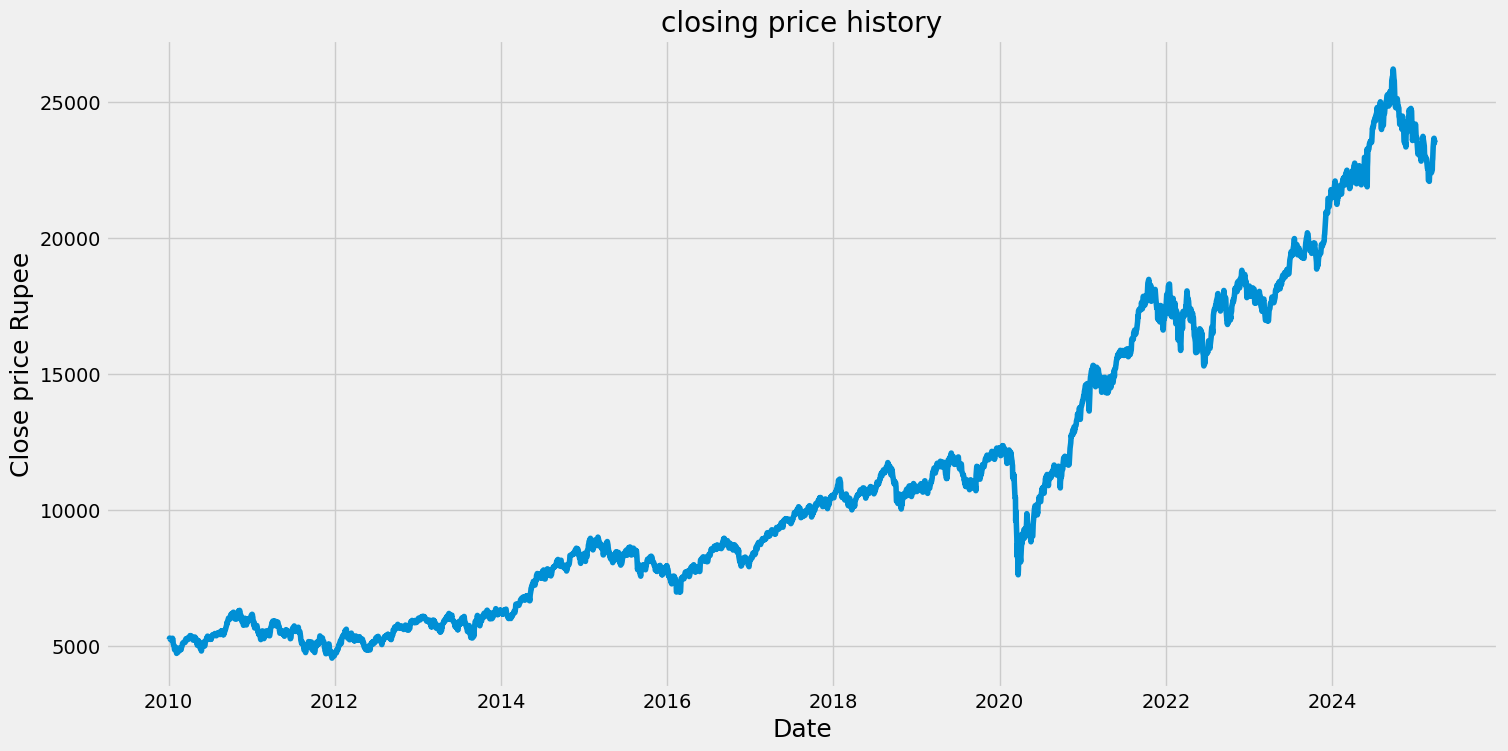

In [4]:
plt.figure(figsize=(16,8))
plt.title("closing price history")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price Rupee', fontsize =18)
plt.show()





In [5]:
data=df[['Close']]
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)

training_data_len
print(dataset.shape)

(3741, 1)


In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data



array([[0.03174625],
       [0.03385496],
       [0.03403492],
       ...,
       [0.874067  ],
       [0.87891659],
       [0.87556664]])

In [7]:
train_data=scaled_data[0:training_data_len ,:]
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60 : i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()








[array([0.03174625, 0.03385496, 0.03403492, 0.03317206, 0.03232533,
       0.03253989, 0.03074032, 0.031827  , 0.03302439, 0.03266911,
       0.03371424, 0.031444  , 0.03126175, 0.02537622, 0.02269302,
       0.02139641, 0.01425351, 0.01490642, 0.01558933, 0.01640377,
       0.01319222, 0.01788725, 0.0138959 , 0.0080496 , 0.00997606,
       0.01146417, 0.00982842, 0.01304226, 0.01189331, 0.01437578,
       0.0170636 , 0.01585235, 0.01387513, 0.01440577, 0.01503562,
       0.01450729, 0.01456035, 0.01744658, 0.02181631, 0.02509707,
       0.02473484, 0.02512476, 0.02675359, 0.02571538, 0.02639598,
       0.02718733, 0.02735345, 0.02697969, 0.03017278, 0.03173239,
       0.03237839, 0.0331582 , 0.03050039, 0.03142785, 0.03304746,
       0.03404415, 0.03500624, 0.03314207, 0.03252606, 0.03443637])]
[0.03803088729146459]

[array([0.03174625, 0.03385496, 0.03403492, 0.03317206, 0.03232533,
       0.03253989, 0.03074032, 0.031827  , 0.03302439, 0.03266911,
       0.03371424, 0.031444  , 0.03

In [8]:
#covert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [13]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2933, 60, 1)

In [16]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))





C:\Users\anuka\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
 #compile the model
model.compile(optimizer='adam',loss='mean_squared_error')




In [18]:
#train the model
model.fit(x_train,y_train, batch_size=1,epochs=1)




2933/2933 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step - loss: 8.0916e-04


In [23]:
#create testing dataset
#create a new array containing scaled values from index 2933 to 4000
test_data=scaled_data[training_data_len-60: , :]
#create dataset set x_tests and y_tests
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i,0])






In [24]:
#converrt data to numpy array 
x_test=np.array(x_test)



In [25]:
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1)) 

In [26]:
#get the models predicted value
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)



24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step


In [27]:
#get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse



55.46581639580548

C:\Users\anuka\AppData\Local\Temp\ipykernel_22708\234691193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


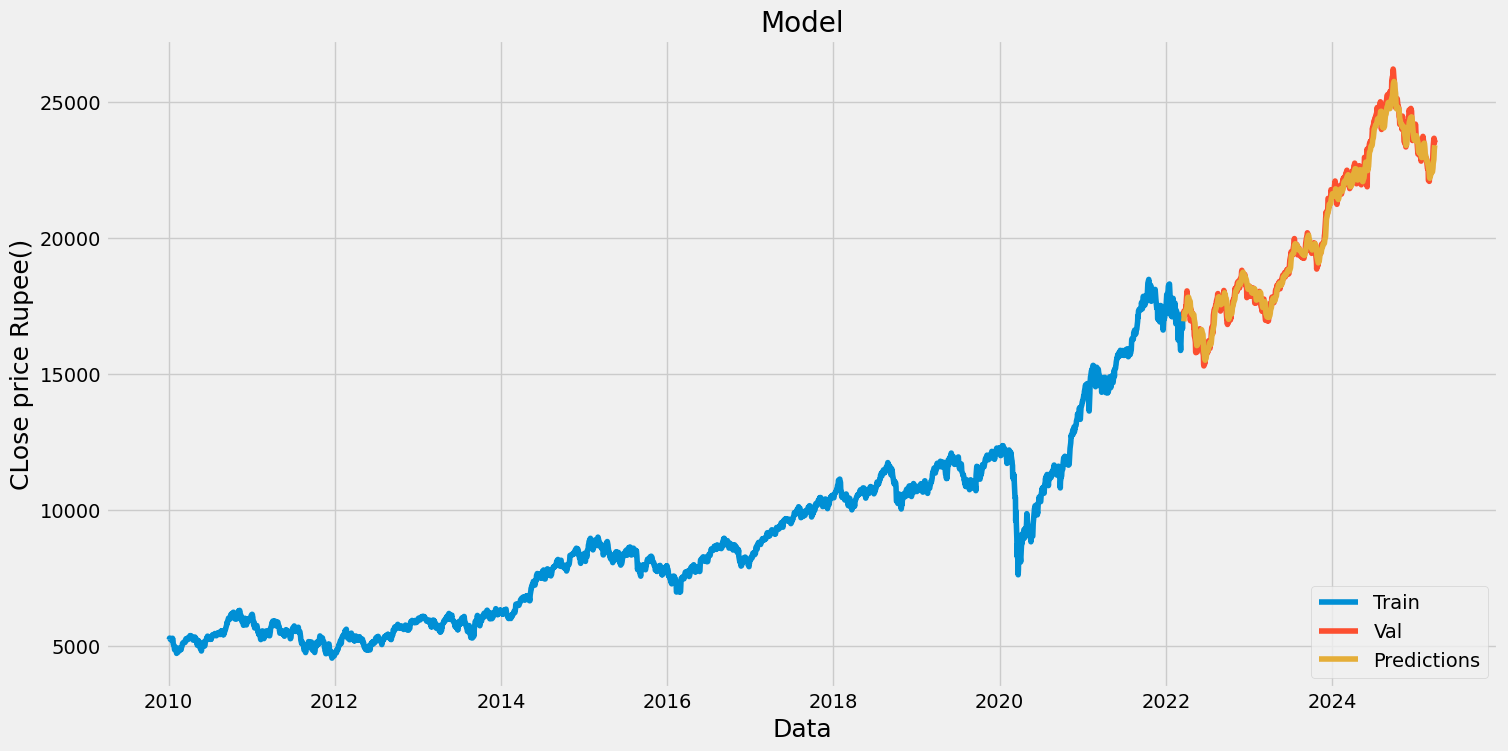

In [34]:
#PLot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('CLose price Rupee()',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()









In [35]:
#Show VAlid and Predicted Price
valid


Price,Close,Predictions
Ticker,^NSEI,
Date,,
2022-03-21,17117.599609,16932.791016
2022-03-22,17315.500000,17048.962891
2022-03-23,17245.650391,17159.660156
2022-03-24,17222.750000,17232.951172
2022-03-25,17153.000000,17270.601562
...,...,...
2025-03-24,23658.349609,22887.802734
2025-03-25,23668.650391,23082.710938


In [48]:
#get the Quote 
nsei_quote=yf.download('^NSEI',start='2010-01-01',end='2025-03-27')
new_df=nsei_quote[['Close']]
#Get the last 60 day closing price value and covert the  dataframe to an array
last_60_days=new_df[-60:].values
#scale the data  to be value between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#covert the X_test to numpy array
X_test=np.array(X_test)
#reshape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#predicted scale price
pred_price=model.predict(X_test)
#undo the scalling 
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)










[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[[23351.008]]


In [51]:
nsei_quote2=yf.download('^NSEI',start='2025-03-28',end='2025-03-29')
nsei_quote2['Close']


[*********************100%***********************]  1 of 1 completed


Ticker,^NSEI
Date,
2025-03-28,23519.349609
